In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
# Import mnist digist dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [33]:
# Lets check shape
X_train.shape

(60000, 28, 28)

In [34]:
# Check first image shape
X_train[0].shape

(28, 28)

In [35]:
# Check first image values
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

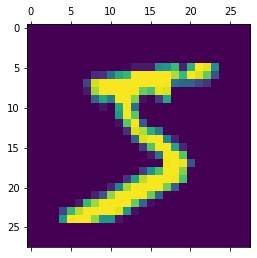

In [36]:
# Let's plot first training image
plt.matshow(X_train[0])

In [37]:
# Let's chcek corresponding labels
y_train[0]

5

In [38]:
# Let's scale our image data (0-1)
X_train = X_train/255
X_test = X_test/255

In [39]:
# Let's flatten our data (28x28 = 784)
X_train_flatten = X_train.reshape(len(X_train), (28*28))
X_test_flatten = X_test.reshape(len(X_test), (28*28))

In [40]:
# Let's check new shape(1D)
print(f"Train Flatten Images Shape: {X_train_flatten.shape}")
print(f"Train Flatten Images Shape: {X_test_flatten.shape}")

Train Flatten Images Shape: (60000, 784)
Train Flatten Images Shape: (10000, 784)


In [41]:
# Let's check first flatten image
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
# Let's check total values of first flatten image
len(X_train_flatten[0])

784

In [43]:
# Let's check now single image dimension
X_train_flatten[0].shape

(784,)

**wow! it has been converted from 2D to 1D. Nice**

# 1. Create a simple neural neural network

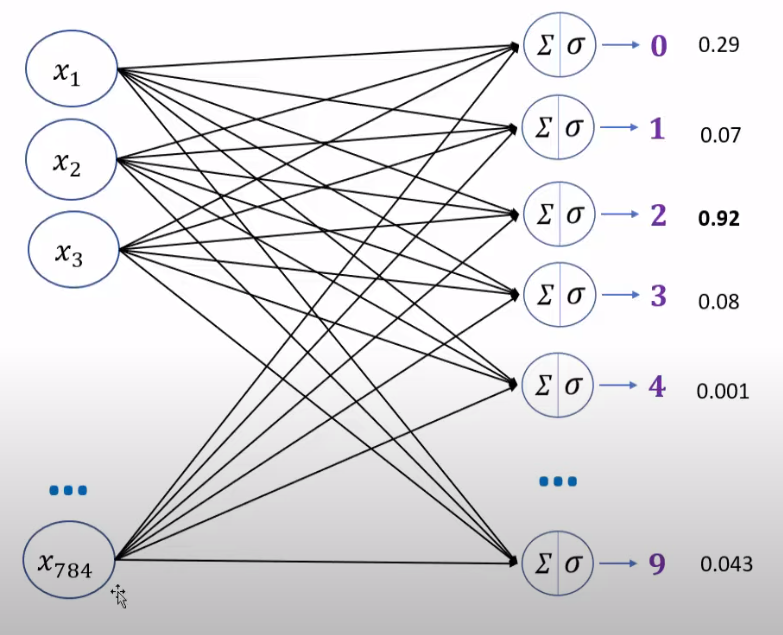

In [44]:
# Create a very simple neural network which don't have hidden layer just input and output

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compline our neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']     
              )

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4746 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9162
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2838 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258


### Here,

* **10** = `Output neuron`
* **(784,)** = `Input Shape`
* **Dense** = `every neuron interconnected with each other`

In [45]:
# Let's evaluate test data set with our model
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9272


[0.2663755714893341, 0.9272000193595886]

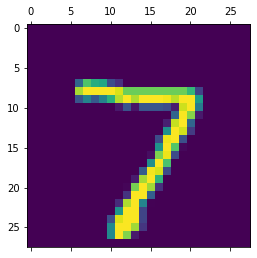

In [48]:
plt.matshow(X_test[0])

In [50]:
# Simple prediction
y_pred = model.predict(X_test_flatten)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.5560386e-02, 3.9549670e-07, 7.4769780e-02, 9.5628071e-01,
       1.6028176e-03, 1.2357369e-01, 1.4169643e-06, 9.9975008e-01,
       8.3141550e-02, 6.5858859e-01], dtype=float32)

In [51]:
# Let's find index where maximum happen
np.argmax(y_pred[0])

7

In [53]:
# Lert's find all corresponding labels
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [54]:
# Ground truth labels
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [55]:
# Let's see the confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    6,    5,    2,    1,    0],
       [   0, 1115,    4,    2,    0,    1,    4,    2,    7,    0],
       [   3,    7,  941,   13,    7,    4,   11,    8,   34,    4],
       [   2,    0,   25,  922,    0,   21,    2,    9,   21,    8],
       [   2,    1,   11,    1,  904,    0,    7,    4,   10,   42],
       [   8,    3,    5,   31,    6,  784,   12,    5,   31,    7],
       [  10,    3,   12,    1,    7,   17,  905,    2,    1,    0],
       [   1,    7,   27,    8,    6,    0,    0,  936,    3,   40],
       [   7,    9,    8,   20,    9,   24,    9,    9,  869,   10],
       [  10,    7,    1,   11,   19,    7,    0,   14,    6,  934]],
      dtype=int32)>

Text(69.0, 0.5, 'True Labels')

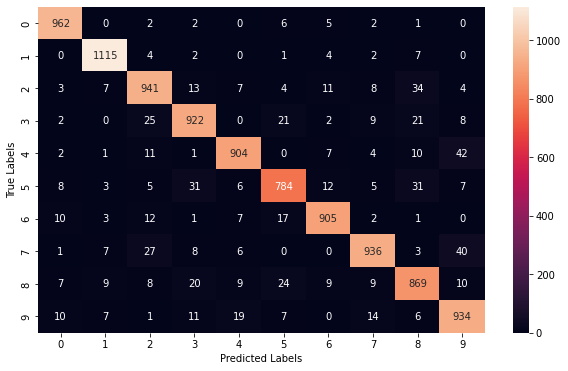

In [56]:
# Let's visualize

import seaborn as sn

plt.figure(figsize=(10,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# 2. Let's add hiden layes and see what happens


In [58]:
# Create a very simple neural network which don't have hidden layer just input and output

model_1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # First Layer (input and hidden)
    keras.layers.Dense(10, activation='sigmoid'), # Output Layer
])

# Compline our neural network
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']     
              )

model_1.fit(X_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2735 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1251 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0865 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0661 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0417 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0242 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

### Here,

* **100** = `Hidden layer's neuron`
* **(784,)** = `Input Shape`
* **10** = `Output layer's neuron`
* **Dense** = `every neuron interconnected with each other`


> wow ! we can see that our new model now accuary and performance has been increased `99%`. Nice. But withou hidden layer we got `92%` before. That's great

In [59]:
# Let's evaluate
model_1.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9784


[0.08113403618335724, 0.9783999919891357]

In [61]:
# Simple prediction
y_pred_1 = model_1.predict(X_test_flatten)
y_pred_1[0]

313/313 [==============================] - 1s 3ms/step


array([1.8017895e-04, 5.0240169e-06, 2.0801383e-01, 8.6455095e-01,
       4.0056680e-08, 7.1531278e-05, 1.2880891e-09, 9.9999809e-01,
       1.2114244e-01, 1.5619300e-01], dtype=float32)

In [62]:
# Lert's find all corresponding labels
y_pred_labels_1 = [np.argmax(i) for i in y_pred_1]
y_pred_labels_1[:5]

[7, 2, 1, 0, 4]

In [63]:
# Ground truth labels
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [65]:
# Let's see the confusion matrix
cm_1 = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels_1)
cm_1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    1,    1,    0,    1,    2,    3,    1],
       [   0, 1124,    4,    0,    0,    0,    1,    1,    5,    0],
       [   3,    1, 1010,    3,    1,    0,    2,    6,    5,    1],
       [   0,    0,    4,  981,    0,    7,    0,    4,   12,    2],
       [   1,    0,    6,    1,  946,    1,    4,    5,    4,   14],
       [   2,    0,    1,    8,    2,  871,    2,    1,    4,    1],
       [   3,    3,    1,    1,    6,    3,  936,    0,    5,    0],
       [   0,    4,    6,    1,    0,    0,    0, 1013,    1,    3],
       [   6,    0,    2,    3,    3,    3,    1,    4,  951,    1],
       [   1,    4,    0,    3,    6,    1,    1,    6,    6,  981]],
      dtype=int32)>

### 2.1 Let's visualize again with confusion matrix

Text(69.0, 0.5, 'True Labels')

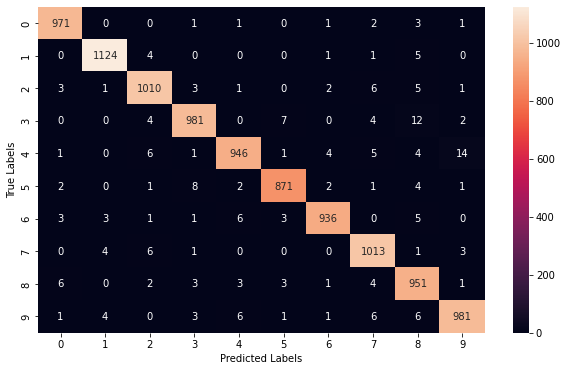

In [66]:
# Let's visualize
plt.figure(figsize=(10,6))
sn.heatmap(cm_1, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

### 2.2 Let's compare confusion matrix with and without hidden layer

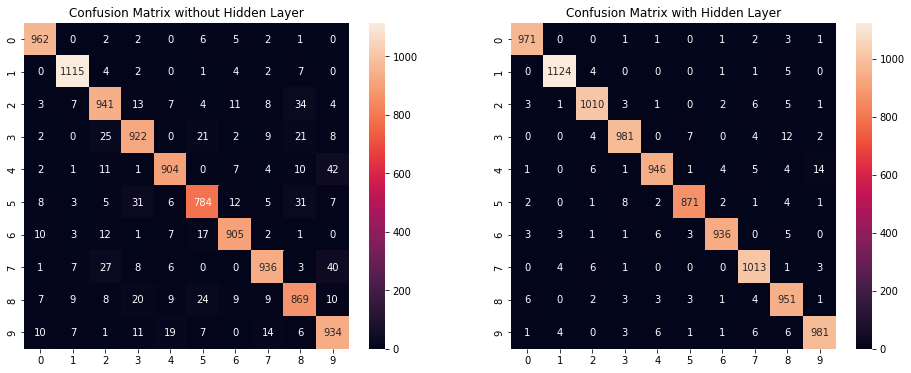

In [88]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix without Hidden Layer')
sn.heatmap(cm, annot=True, fmt='d')

plt.subplot(1, 2, 2)
plt.title('Confusion Matrix with Hidden Layer')
sn.heatmap(cm_1, annot=True, fmt='d')

# 3. Last two examples we flatten our image data manually. But we can do it by using `keras.Flatten(input_shape = (dimensions)`

Okey, let's see

In [95]:
# Create a very simple neural network which don't have hidden layer just input and output

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Image will flatten according to it's sahpe
    keras.layers.Dense(100, activation='relu'), # First Layer (input and hidden)
    keras.layers.Dense(10, activation='sigmoid'), # Output Layer
])

# Compline our neural network
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']     
              )

model_2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2766 - accuracy: 0.9200
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1275 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0893 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0521 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019